In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from windrose import WindroseAxes
import numpy as np

In [48]:
df = pd.read_csv('../../data/benin-malanville.csv',  parse_dates=["Timestamp"])

In [8]:
df.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,NaN
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,NaN
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,NaN
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,NaN
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,NaN


In [9]:
df.describe()

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,240.559452,167.187516,115.358961,236.589496,228.883576,28.179683,54.487969,2.121113,2.809195,0.473390,153.435172,8.582407,994.197199,0.000923,0.001905,35.246026,32.471736,NaN
std,331.131327,261.710501,158.691074,326.894859,316.536515,5.924297,28.073069,1.603466,2.029120,0.273395,102.332842,6.385864,2.474993,0.030363,0.037115,14.807258,12.348743,NaN
min,-12.900000,-7.800000,-12.600000,0.000000,0.000000,11.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,985.000000,0.000000,0.000000,9.000000,8.100000,NaN
25%,-2.000000,-0.500000,-2.100000,0.000000,0.000000,24.200000,28.800000,1.000000,1.300000,0.400000,59.000000,3.700000,993.000000,0.000000,0.000000,24.200000,23.600000,NaN
50%,1.800000,-0.100000,1.600000,4.500000,4.300000,28.000000,55.100000,1.900000,2.600000,0.500000,181.000000,8.600000,994.000000,0.000000,0.000000,30.000000,28.900000,NaN
75%,483.400000,314.200000,216.300000,463.700000,447.900000,32.300000,80.100000,3.100000,4.100000,0.600000,235.100000,12.300000,996.000000,0.000000,0.000000,46.900000,41.500000,NaN
max,1413.000000,952.300000,759.200000,1342.300000,1342.300000,43.800000,100.000000,19.500000,26.600000,4.200000,360.000000,99.400000,1003.000000,1.000000,2.500000,81.000000,72.500000,NaN


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

In [11]:
df.value_counts('Timestamp')

Timestamp
2021-08-09 00:01    1
2022-04-09 06:36    1
2022-04-09 08:10    1
2022-04-09 08:09    1
2022-04-09 08:08    1
                   ..
2021-12-08 15:55    1
2021-12-08 15:54    1
2021-12-08 15:53    1
2021-12-08 15:52    1
2022-08-09 00:00    1
Name: count, Length: 525600, dtype: int64

In [12]:
df.dtypes

Timestamp         object
GHI              float64
DNI              float64
DHI              float64
ModA             float64
ModB             float64
Tamb             float64
RH               float64
WS               float64
WSgust           float64
WSstdev          float64
WD               float64
WDstdev          float64
BP                 int64
Cleaning           int64
Precipitation    float64
TModA            float64
TModB            float64
Comments         float64
dtype: object

In [16]:
df['Timestamp'].min()


'2021-08-09 00:01'

In [17]:
df['Timestamp'].max()

'2022-08-09 00:00'

In [23]:
df.groupby('Precipitation').size()


Precipitation
0.0    521811
0.1      2387
0.2       480
0.3       205
0.4       127
0.5       107
0.6        96
0.7        69
0.8        57
0.9        41
1.0        30
1.1        44
1.2        30
1.3        20
1.4        20
1.5        13
1.6        10
1.7         8
1.8         9
1.9         6
2.0         4
2.1         3
2.2         7
2.3        10
2.4         5
2.5         1
dtype: int64

In [ ]:
# Calculate the percentage of missing values
missing_percent = (df.isna().sum() / len(df)) * 100

# Filter columns with >5% nulls
columns_with_nulls = missing_percent[missing_percent > 5]
print(columns_with_nulls)

Comments    100.0
dtype: float64


In [38]:
def detect_outliers(df, cols):
    Q1 = df[cols].quantile(0.25)
    Q3 = df[cols].quantile(0.75)
    IQR = Q3 - Q1
    return df[((df[cols] < (Q1 - 1.5 * IQR)) | (df[cols] > (Q3 + 1.5 * IQR)))]

outliers = detect_outliers(df, ["GHI", "DNI", "DHI", "ModA", "ModB", "WS", "WSgust"])
print("Outliers detected:\n", outliers)

Outliers detected:
        Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb  RH  WS  WSgust  WSstdev  \
0            NaN  NaN  NaN  NaN   NaN   NaN   NaN NaN NaN     NaN      NaN   
1            NaN  NaN  NaN  NaN   NaN   NaN   NaN NaN NaN     NaN      NaN   
2            NaN  NaN  NaN  NaN   NaN   NaN   NaN NaN NaN     NaN      NaN   
3            NaN  NaN  NaN  NaN   NaN   NaN   NaN NaN NaN     NaN      NaN   
4            NaN  NaN  NaN  NaN   NaN   NaN   NaN NaN NaN     NaN      NaN   
...          ...  ...  ...  ...   ...   ...   ...  ..  ..     ...      ...   
525595       NaN  NaN  NaN  NaN   NaN   NaN   NaN NaN NaN     NaN      NaN   
525596       NaN  NaN  NaN  NaN   NaN   NaN   NaN NaN NaN     NaN      NaN   
525597       NaN  NaN  NaN  NaN   NaN   NaN   NaN NaN NaN     NaN      NaN   
525598       NaN  NaN  NaN  NaN   NaN   NaN   NaN NaN NaN     NaN      NaN   
525599       NaN  NaN  NaN  NaN   NaN   NaN   NaN NaN NaN     NaN      NaN   

        WD  WDstdev  BP  Cleaning  Precipit

In [39]:
from scipy.stats import zscore

# Compute Z-scores
z_cols = ["GHI", "DNI", "DHI", "ModA", "ModB", "WS", "WSgust"]
df["Z_GHI"] = zscore(df["GHI"])
df["Z_DNI"] = zscore(df["DNI"])
df["Z_DHI"] = zscore(df["DHI"])
df["Z_ModA"] = zscore(df["ModA"])
df["Z_ModB"] = zscore(df["ModB"])
df["Z_WS"] = zscore(df["WS"])
df["Z_WSgust"] = zscore(df["WSgust"])

# Flag rows with |Z| > 3
outliers_z = df[(df[z_cols].apply(lambda x: abs(x) > 3)).any(axis=1)]
print("Z-score based outliers:\n", outliers_z)

Z-score based outliers:
                Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
130     2021-08-09 02:11 -0.8  0.0 -0.7   0.0   0.0  25.9  94.0  2.6     3.1   
131     2021-08-09 02:12 -0.8  0.0 -0.7   0.0   0.0  25.9  93.6  2.6     3.1   
133     2021-08-09 02:14 -0.8 -0.1 -0.7   0.0   0.0  25.9  93.7  2.3     3.1   
136     2021-08-09 02:17 -0.8  0.0 -0.7   0.0   0.0  26.0  93.3  2.4     3.1   
148     2021-08-09 02:29 -1.0 -0.1 -1.0   0.0   0.0  25.9  93.3  2.3     3.1   
...                  ...  ...  ...  ...   ...   ...   ...   ...  ...     ...   
525595  2022-08-08 23:56 -5.5 -0.1 -5.9   0.0   0.0  23.1  98.3  0.3     1.1   
525596  2022-08-08 23:57 -5.5 -0.1 -5.8   0.0   0.0  23.1  98.3  0.2     0.7   
525597  2022-08-08 23:58 -5.5 -0.1 -5.8   0.0   0.0  23.1  98.4  0.6     1.1   
525598  2022-08-08 23:59 -5.5 -0.1 -5.8   0.0   0.0  23.1  98.3  0.9     1.3   
525599  2022-08-09 00:00 -5.5 -0.1 -5.7   0.0   0.0  23.1  98.3  1.2     1.6   

        ...  T

In [43]:
# Drop rows where key columns are missing
df_cleaned = df.dropna(subset=z_cols)

# Impute missing values using the median
#df_imputed = df.fillna(df.median())

print("Final cleaned dataset:\n", df_cleaned.head())

Final cleaned dataset:
           Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  ...  \
0  2021-08-09 00:01 -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0     0.4  ...   
1  2021-08-09 00:02 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0     0.0  ...   
2  2021-08-09 00:03 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.7  0.3     1.1  ...   
3  2021-08-09 00:04 -1.1 -0.1 -1.0   0.0   0.0  26.2  93.3  0.2     0.7  ...   
4  2021-08-09 00:05 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.3  0.1     0.7  ...   

   TModA  TModB  Comments     Z_GHI     Z_DNI     Z_DHI    Z_ModA    Z_ModB  \
0   26.3   26.2       NaN -0.730102 -0.639591 -0.733873 -0.723749 -0.723088   
1   26.3   26.2       NaN -0.729800 -0.639591 -0.733873 -0.723749 -0.723088   
2   26.4   26.2       NaN -0.729800 -0.639591 -0.733873 -0.723749 -0.723088   
3   26.4   26.3       NaN -0.729800 -0.639209 -0.733243 -0.723749 -0.723088   
4   26.4   26.3       NaN -0.729498 -0.639209 -0.733243 -0.723749 -0.723088   

       Z_WS  Z_WSgus

In [45]:
country = "Benin"  # Change this dynamically per dataset
file_path = f"../../data/{country.lower()}_clean.csv"

# Export to CSV
df_cleaned.to_csv(file_path, index=False)
print(f"Cleaned data saved at: {file_path}")

Cleaned data saved at: ../../data/benin_clean.csv


In [49]:
df.set_index("Timestamp", inplace=True)

# Resampling by day for smoother trends
df_daily = df.resample("D").mean()

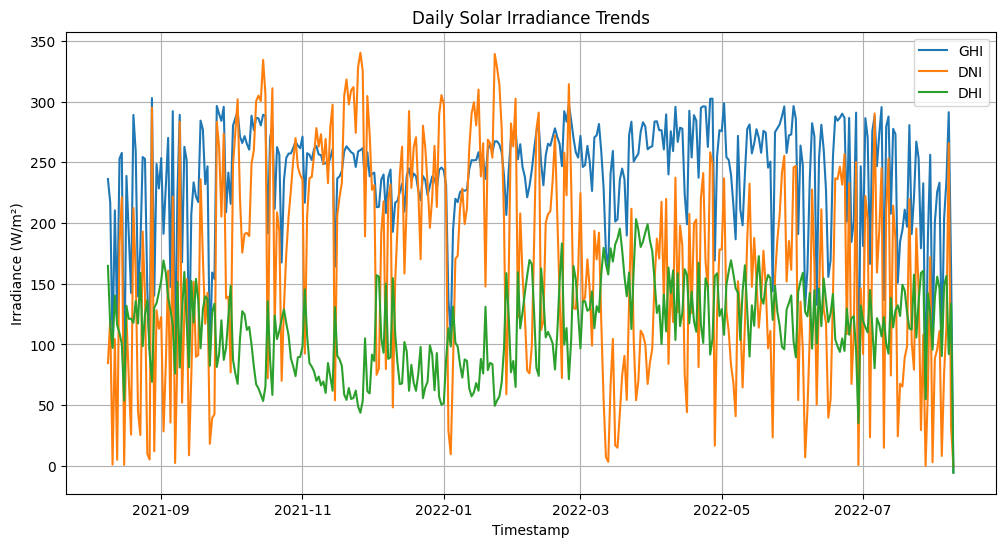

In [50]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_daily, x=df_daily.index, y="GHI", label="GHI")
sns.lineplot(data=df_daily, x=df_daily.index, y="DNI", label="DNI")
sns.lineplot(data=df_daily, x=df_daily.index, y="DHI", label="DHI")

plt.xlabel("Timestamp")
plt.ylabel("Irradiance (W/m²)")
plt.title("Daily Solar Irradiance Trends")
plt.legend()
plt.grid()
plt.show()

C:\Users\Abdilfatah\AppData\Local\Temp\ipykernel_5928\2676104904.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df.resample("M").mean()


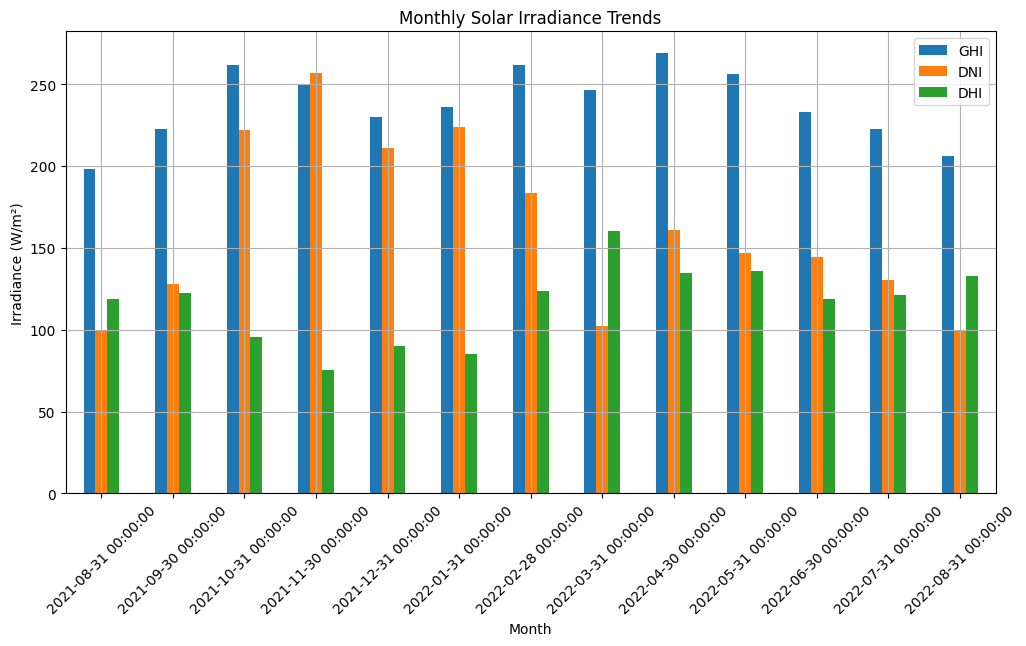

In [51]:
df_monthly = df.resample("M").mean()
df_monthly.plot(kind="bar", figsize=(12, 6), y=["GHI", "DNI", "DHI"])
plt.title("Monthly Solar Irradiance Trends")
plt.xlabel("Month")
plt.ylabel("Irradiance (W/m²)")
plt.xticks(rotation=45)
plt.grid()
plt.show()

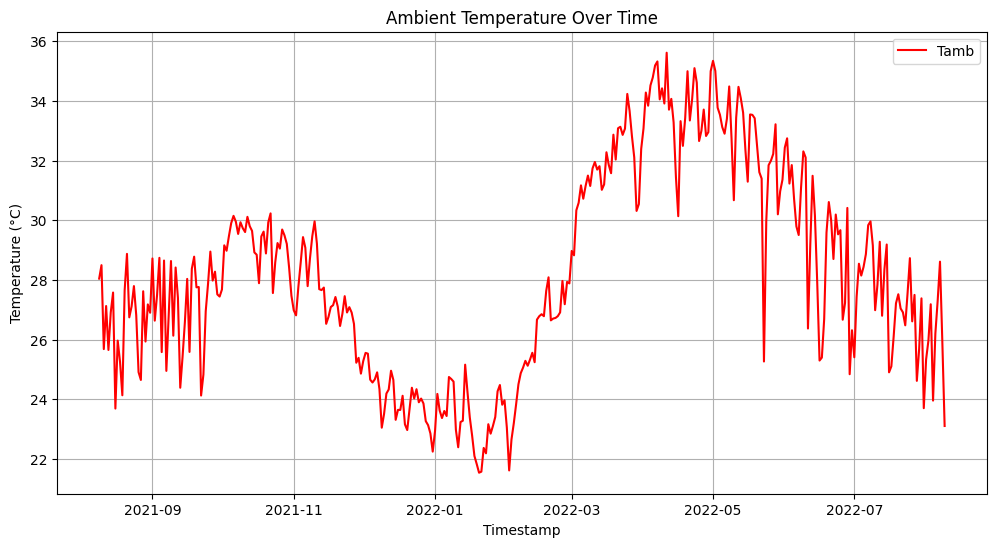

In [52]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_daily, x=df_daily.index, y="Tamb", color="red", label="Tamb")
plt.xlabel("Timestamp")
plt.ylabel("Temperature (°C)")
plt.title("Ambient Temperature Over Time")
plt.legend()
plt.grid()
plt.show()

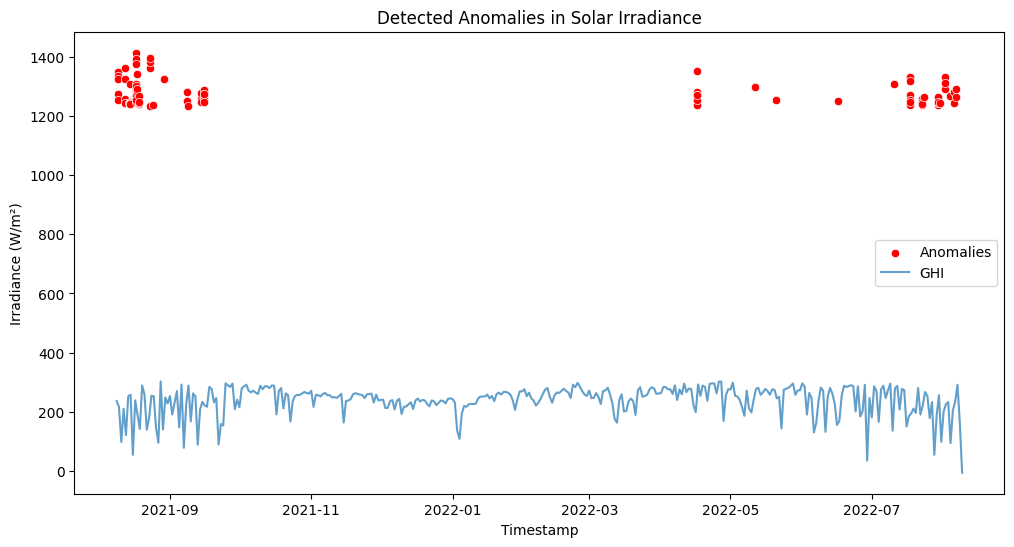

In [53]:
from scipy.stats import zscore

# Compute Z-scores
df["Z_GHI"] = zscore(df["GHI"])
df_anomalies = df[df["Z_GHI"].abs() > 3]  # Flagged anomalies (|Z| > 3)

# Plot anomalies
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_anomalies, x=df_anomalies.index, y="GHI", color="red", label="Anomalies")
sns.lineplot(data=df_daily, x=df_daily.index, y="GHI", label="GHI", alpha=0.7)
plt.xlabel("Timestamp")
plt.ylabel("Irradiance (W/m²)")
plt.title("Detected Anomalies in Solar Irradiance")
plt.legend()
plt.show()

In [54]:
# Group by Cleaning flag and compute mean
cleaning_avg = df.groupby("Cleaning")[["ModA", "ModB"]].mean()
print(cleaning_avg)

                ModA        ModB
Cleaning                        
0         236.524253  228.816071
1         307.229278  301.972165


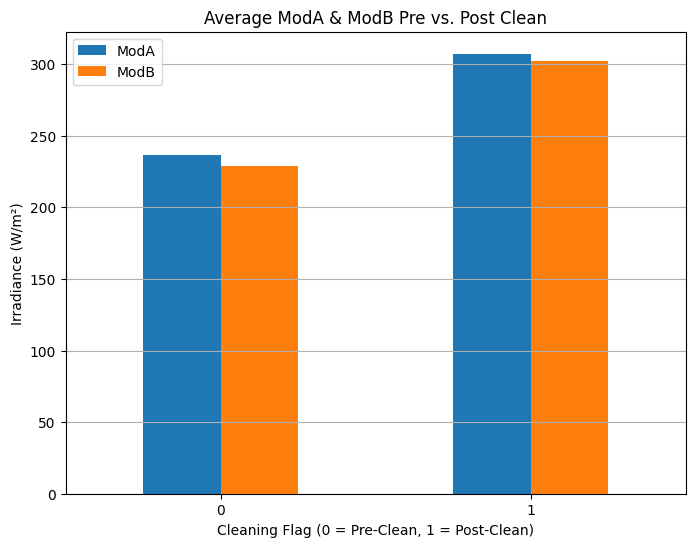

In [55]:
# Plot
cleaning_avg.plot(kind="bar", figsize=(8, 6), rot=0)
plt.title("Average ModA & ModB Pre vs. Post Clean")
plt.xlabel("Cleaning Flag (0 = Pre-Clean, 1 = Post-Clean)")
plt.ylabel("Irradiance (W/m²)")
plt.legend(["ModA", "ModB"])
plt.grid(axis="y")
plt.show()

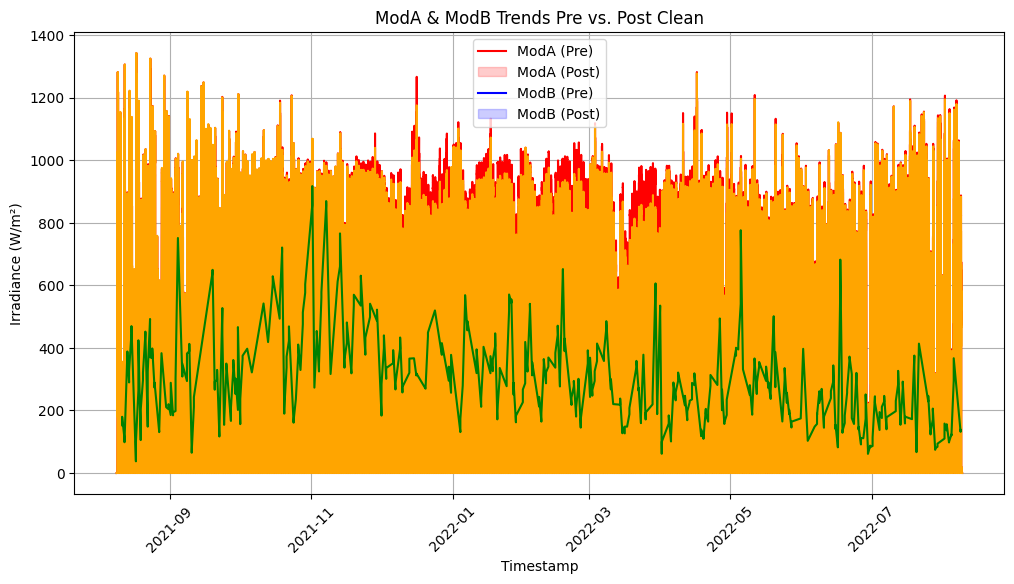

In [56]:
# Set figure size
plt.figure(figsize=(12, 6))

# Line plot showing ModA and ModB values pre vs. post clean
sns.lineplot(data=df, x="Timestamp", y="ModA", hue="Cleaning", palette=["red", "blue"])
sns.lineplot(data=df, x="Timestamp", y="ModB", hue="Cleaning", palette=["orange", "green"])

plt.title("ModA & ModB Trends Pre vs. Post Clean")
plt.xlabel("Timestamp")
plt.ylabel("Irradiance (W/m²)")
plt.legend(["ModA (Pre)", "ModA (Post)", "ModB (Pre)", "ModB (Post)"])
plt.xticks(rotation=45)
plt.grid()
plt.show()

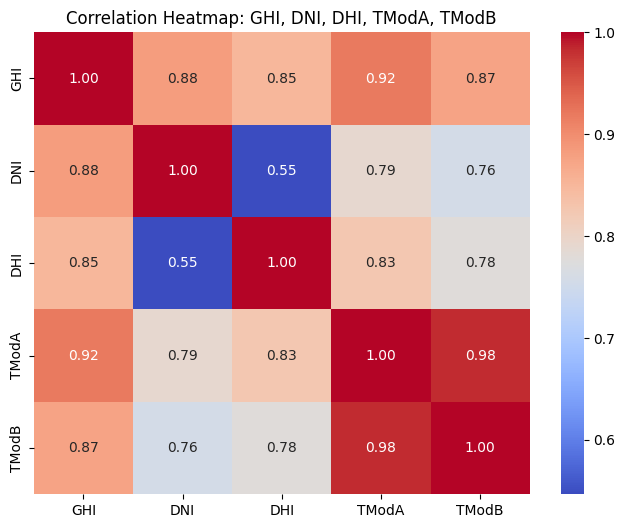

In [57]:
# Select relevant columns
corr_cols = ["GHI", "DNI", "DHI", "TModA", "TModB"]

# Compute correlation matrix
corr_matrix = df[corr_cols].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap: GHI, DNI, DHI, TModA, TModB")
plt.show()

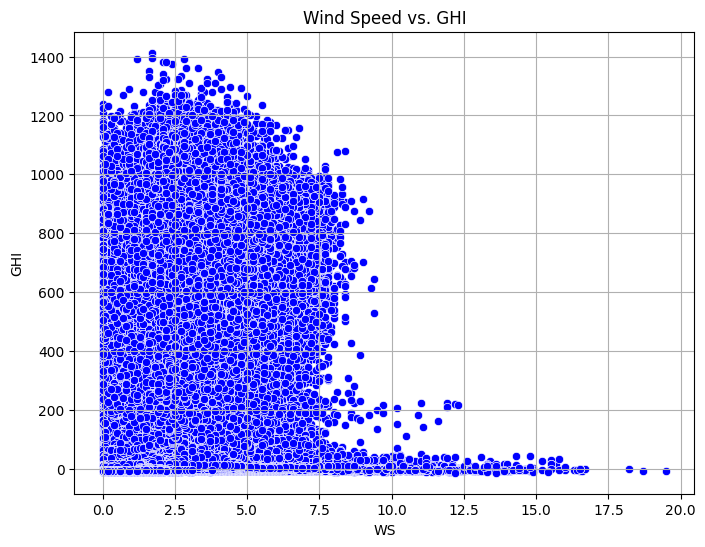

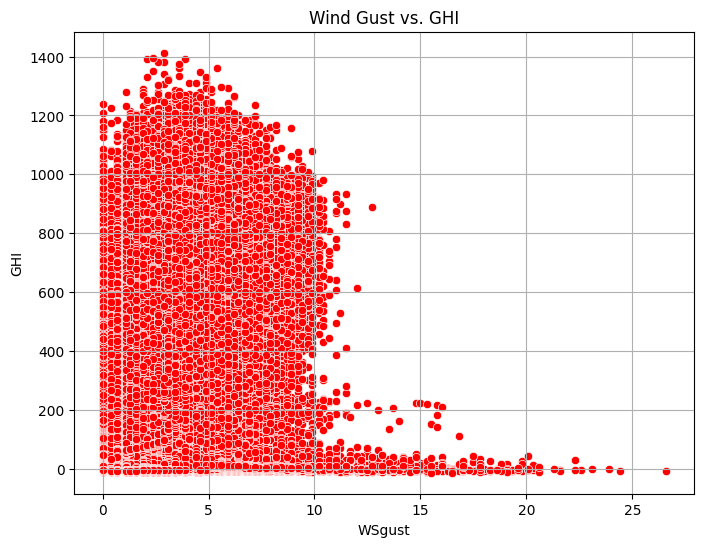

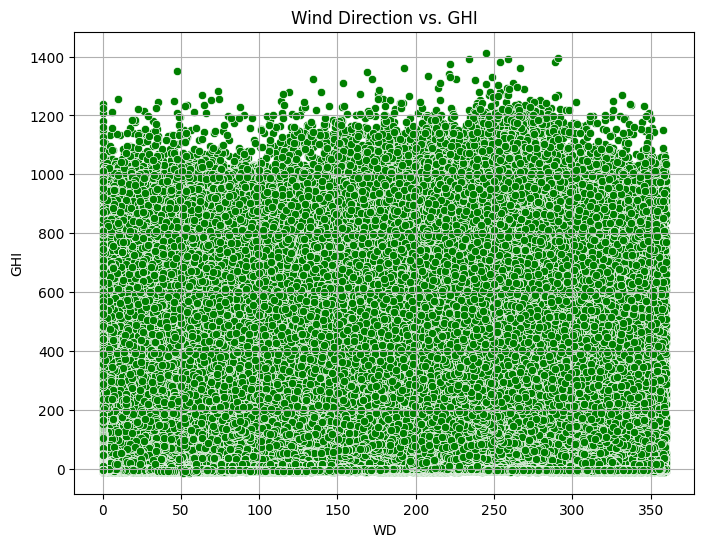

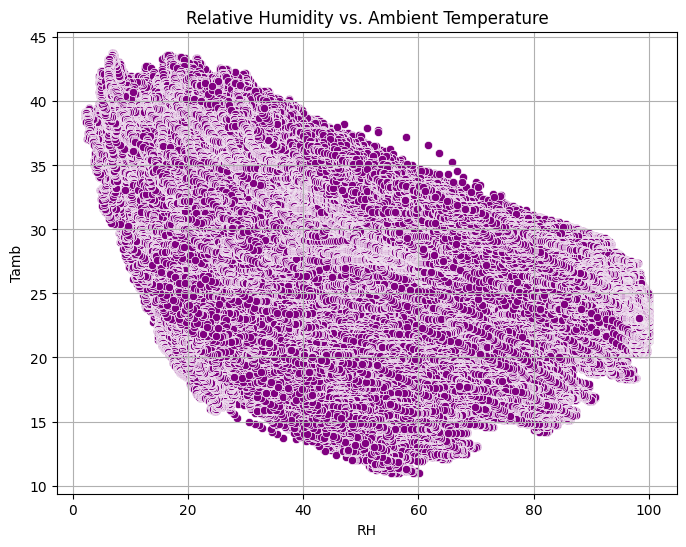

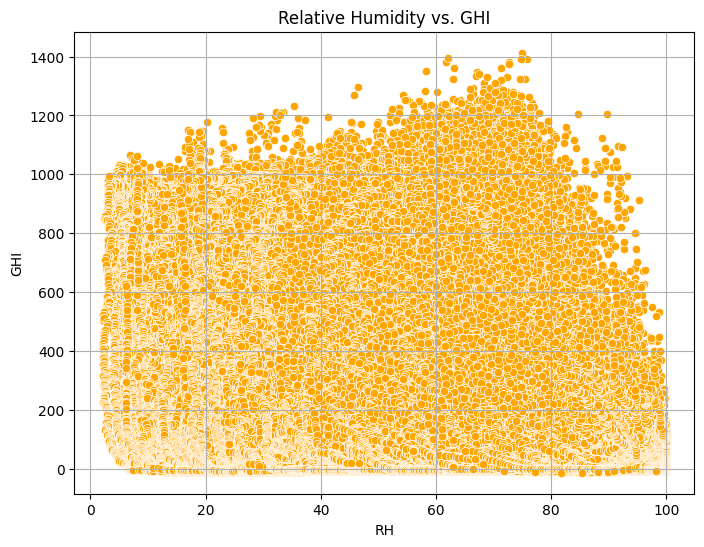

In [58]:
# Define scatter plot function
def scatter_plot(x, y, title, color):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x=x, y=y, color=color)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(title)
    plt.grid()
    plt.show()

# Wind speed variables vs. GHI
scatter_plot("WS", "GHI", "Wind Speed vs. GHI", "blue")
scatter_plot("WSgust", "GHI", "Wind Gust vs. GHI", "red")
scatter_plot("WD", "GHI", "Wind Direction vs. GHI", "green")

# Relative Humidity vs. Temperature or GHI
scatter_plot("RH", "Tamb", "Relative Humidity vs. Ambient Temperature", "purple")
scatter_plot("RH", "GHI", "Relative Humidity vs. GHI", "orange")

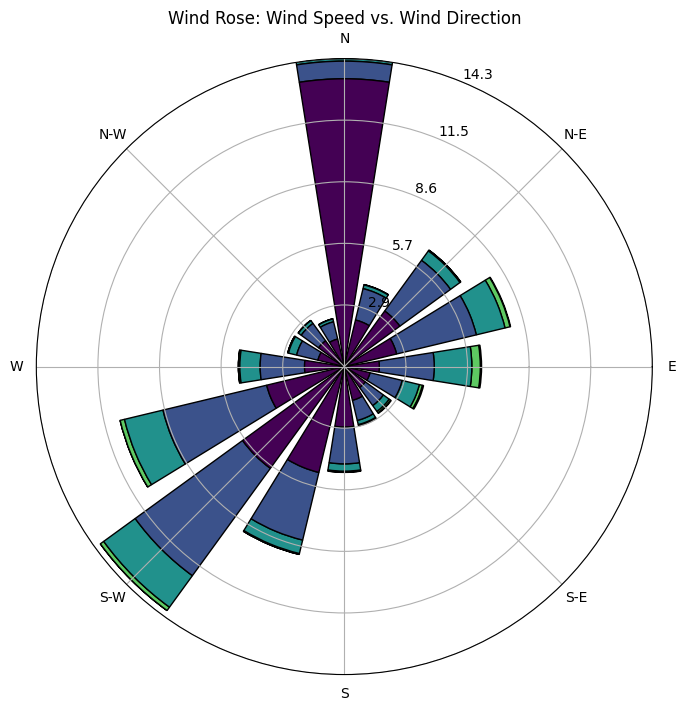

In [65]:
# Set up wind rose plot
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection="windrose")

ax.bar(df["WD"], df["WS"], bins=np.arange(0, 10, 2), normed=True, opening=0.8, edgecolor="black")
ax.set_title("Wind Rose: Wind Speed vs. Wind Direction")
plt.show()

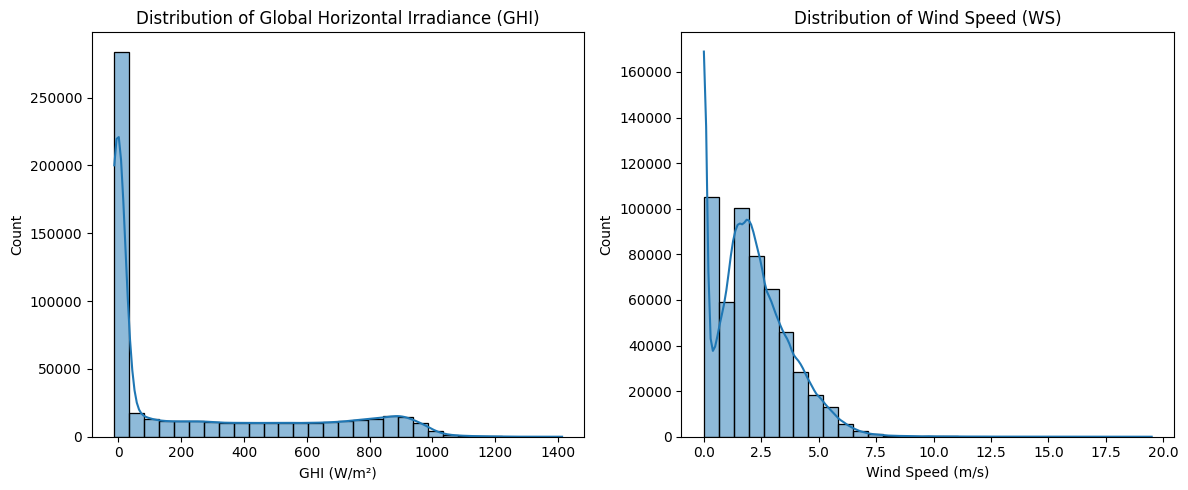

In [66]:
# Set up figure
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histogram of GHI
sns.histplot(df["GHI"], bins=30, kde=True, ax=axes[0])
axes[0].set_title("Distribution of Global Horizontal Irradiance (GHI)")
axes[0].set_xlabel("GHI (W/m²)")
axes[0].set_ylabel("Count")

# Histogram of Wind Speed (WS)
sns.histplot(df["WS"], bins=30, kde=True, ax=axes[1])
axes[1].set_title("Distribution of Wind Speed (WS)")
axes[1].set_xlabel("Wind Speed (m/s)")
axes[1].set_ylabel("Count")

plt.tight_layout()
plt.show()

In [67]:
# Compute correlation matrix for RH, Tamb, and solar radiation variables
corr_matrix = df[["RH", "Tamb", "GHI", "DNI", "DHI"]].corr()
print(corr_matrix)

            RH      Tamb       GHI       DNI       DHI
RH    1.000000 -0.414842 -0.360029 -0.373475 -0.285018
Tamb -0.414842  1.000000  0.547513  0.467584  0.503925
GHI  -0.360029  0.547513  1.000000  0.882376  0.849989
DNI  -0.373475  0.467584  0.882376  1.000000  0.546602
DHI  -0.285018  0.503925  0.849989  0.546602  1.000000


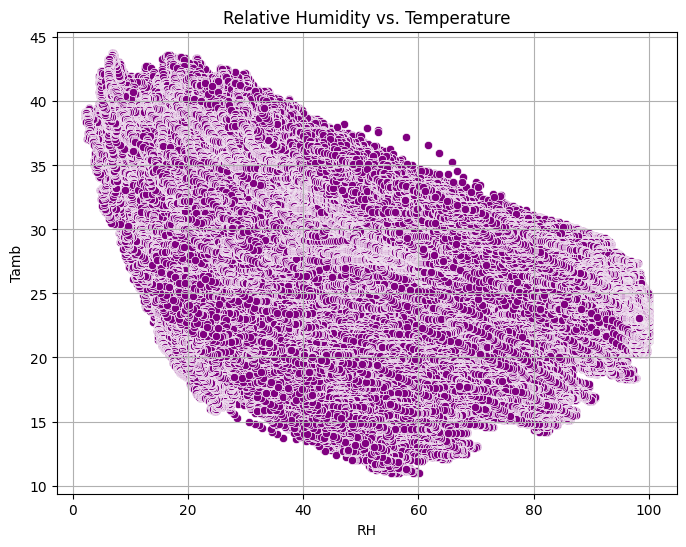

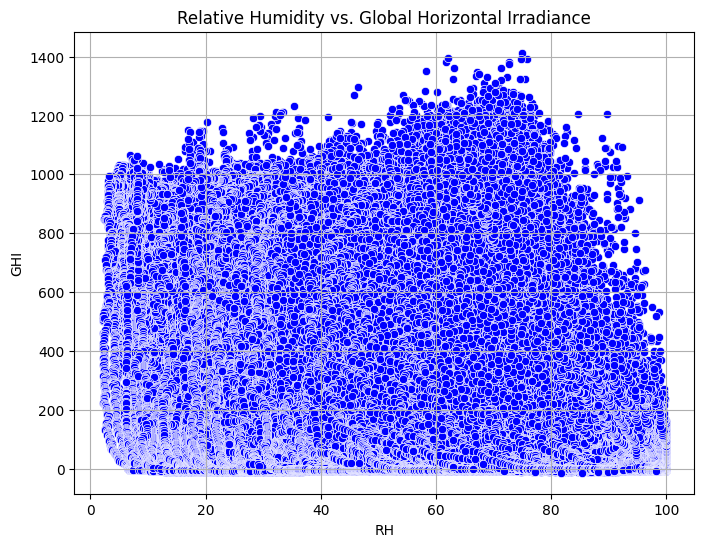

In [68]:
def scatter_plot(x, y, title, color):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x=x, y=y, color=color)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(title)
    plt.grid()
    plt.show()

# RH vs. Tamb (Temperature)
scatter_plot("RH", "Tamb", "Relative Humidity vs. Temperature", "purple")

# RH vs. GHI (Solar Radiation)
scatter_plot("RH", "GHI", "Relative Humidity vs. Global Horizontal Irradiance", "blue")


c:\Users\Abdilfatah\Desktop\KAIM\Week 0\myenv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


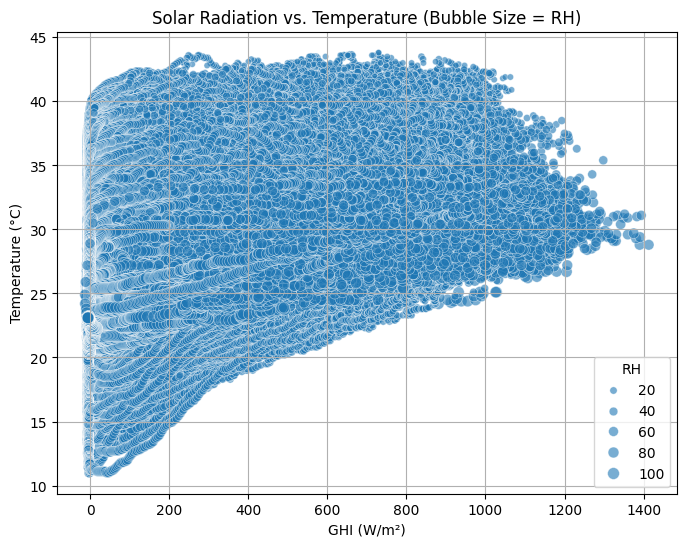

In [69]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="GHI", y="Tamb", size="RH", alpha=0.6)
plt.xlabel("GHI (W/m²)")
plt.ylabel("Temperature (°C)")
plt.title("Solar Radiation vs. Temperature (Bubble Size = RH)")
plt.grid()
plt.show()

C:\Users\Abdilfatah\AppData\Local\Temp\ipykernel_5928\3062303493.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(


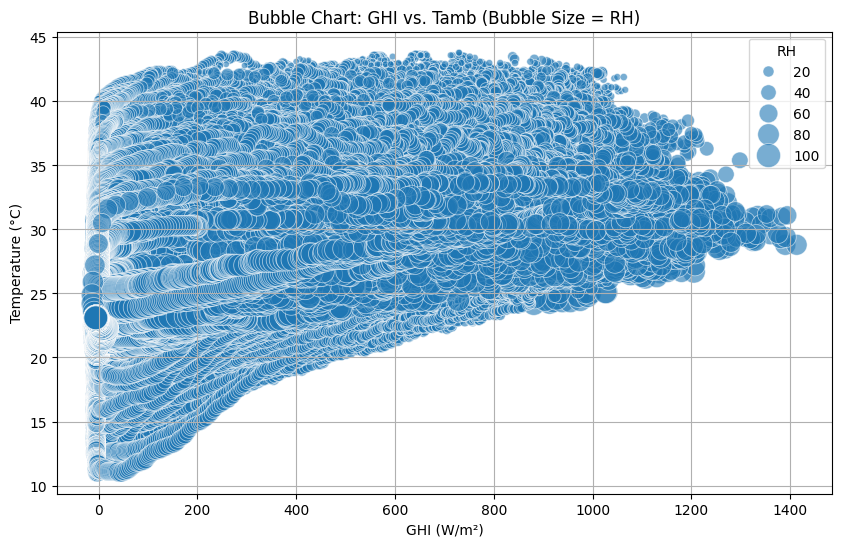

In [70]:
plt.figure(figsize=(10, 6))

# Bubble chart: GHI vs. Tamb with bubble size = RH
sns.scatterplot(
    data=df, x="GHI", y="Tamb", size="RH", alpha=0.6, sizes=(10, 300), palette="coolwarm"
)
plt.xlabel("GHI (W/m²)")
plt.ylabel("Temperature (°C)")
plt.title("Bubble Chart: GHI vs. Tamb (Bubble Size = RH)")
plt.grid()
plt.show()